In [2]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import nilearn.image, nilearn.masking, nilearn.plotting
import numpy as np
import pandas as pd
import scipy.stats, scipy.io
import seaborn as sns
import pickle

In [3]:
subj_list = [
    'GA01', 'GA02', 'GA05', 'GA07', 'GA08', 'GA11', 'GA12', 'GA13', 'GA14', 'GA15',
    'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 'GA26', 'GA27', 'GA28', 'GA29', 'GA30',
    'GA31', 'GA32', 'GA33', 'GA34', 'GA35', 'GA36', 'GA37', 'GA38', 'GA42', 'GA44',
    'GB01', 'GB02', 'GB05', 'GB07', 'GB08', 'GB11', 'GB12', 'GB13', 'GB14', 'GB15',
    'GB18', 'GB19', 'GB20', 'GB21', 'GB23', 'GB26', 'GB27', 'GB28', 'GB29', 'GB30',
    'GB31', 'GB32', 'GB33', 'GB34', 'GB35', 'GB36', 'GB37', 'GB38', 'GB42', 'GB44'
]

In [4]:
data_dir = '/Volumes/clmnlab/GA/fmri_data/glm_results/MO_errts/'

In [ ]:
# import os
# from subprocess import Popen, PIPE

# for subj in subj_list:
#     subj_dir = '%s%s' % (data_dir, subj)
#     os.chdir(subj_dir)
    
#     if subj == 'GB29':
#         runs = 6
#     else:
#         runs = 7
        
#     for run in range(1, runs + 1):
#         data_input = 'bp_demean.errts.MO.%s.r0%d+tlrc.BRIK' % (subj, run)
#         data_output = 'bp_demean.errts.MO.%s.r0%d.nii.gz' % (subj, run)
#         command = '3dAFNItoNIFTI -prefix %s %s' % (data_output, data_input)
#         command = command.split(" ")
#         p = Popen(command, stdout=PIPE)
#         print(p.communicate())

(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b'', None)
(b''

In [6]:
for key, value in ts_data.items():
    ts_data[key] = nilearn.image.index_img(value, np.arange(1, 97))

In [6]:
roi_imgs = {}
roi_names = []

module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    fnames = glob.glob('/Volumes/clmnlab/GA/fmri_data/masks/DMN/%s_*.nii' % (name))
    
    for fname in fnames:
        roi_name = fname.replace('/Volumes/clmnlab/GA/fmri_data/masks/DMN/', '').replace('.nii', '')
        roi_imgs[roi_name] = nilearn.image.load_img(fname)
        roi_names.append(roi_name)
        
roi_path = sorted(glob.glob('/Volumes/clmnlab/GA/fmri_data/masks/localizer/n200_c1*.nii'))

for path in roi_path:
    roi_name = path.split('/')[-1].replace('_mask.nii', '')
    roi_imgs[roi_name] = (nilearn.image.load_img(path))
    roi_names.append(roi_name)

roi_info = pd.read_csv('/Volumes/clmnlab/GA/fmri_data/masks/Fan/20190926/fan_cluster_net_20191010.csv')

for _, row in roi_info.iterrows():
    if row['yeo_17network'] in {1, 2}:
        roi_imgs[row['region']] = nilearn.image.load_img('/Volumes/clmnlab/GA/fmri_data/masks/Fan/Fan280/fan.roi.resam.%.3d.nii' % (row['label']))
        roi_names.append(row['region'])

In [ ]:
roi_imgs = {}
roi_names = []

module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    fnames = glob.glob('/clmnlab/GA/fmri_data/masks/DMN/%s_*.nii' % (name))
    
    for fname in fnames:
        roi_name = fname.replace('/clmnlab/GA/fmri_data/masks/DMN/', '').replace('.nii', '')
        roi_imgs[roi_name] = nilearn.image.load_img(fname)
        roi_names.append(roi_name)
        
roi_path = sorted(glob.glob('/clmnlab/GA/fmri_data/masks/localizer/n200_c1*.nii'))

for path in roi_path:
    roi_name = path.split('/')[-1].replace('_mask.nii', '')
    roi_imgs[roi_name] = (nilearn.image.load_img(path))
    roi_names.append(roi_name)

roi_info = pd.read_csv('/clmnlab/GA/fmri_data/masks/Fan/20190926/fan_cluster_net_20191010.csv')

for _, row in roi_info.iterrows():
    if row['yeo_17network'] in {1, 2}:
        roi_imgs[row['region']] = nilearn.image.load_img('/clmnlab/GA/fmri_data/masks/Fan/Fan280/fan.roi.resam.%.3d.nii' % (row['label']))
        roi_names.append(row['region'])

In [7]:
dmn_roi_names = roi_names[:20]
mot_roi_names = roi_names[20:21]
vis_roi_names = roi_names[21:]

dmn_core_roi_names = dmn_roi_names[:4]
dmn_dmsub_roi_names = dmn_roi_names[4:11]
dmn_mtlsub_roi_names = dmn_roi_names[11:]

In [8]:
def fast_masking(img, roi):
    img_data = img.get_data()
    roi_mask = roi.get_data().astype(bool)
    
    if img_data.shape[:3] != roi_mask.shape:
        raise ValueError('different shape while masking! img=%s and roi=%s' % (img_data.shape, roi_mask.shape))
        
    return img_data[roi_mask, :].T

In [ ]:
ts_data  = {}

for subj in subj_list:
    for run in range(1, 7):
        ts_data[subj, run] = nilearn.image.load_img(data_dir + '%s/bp_demean.errts.MO.%s.r%02d.nii.gz' % (subj, subj, run))
    print(subj, end='\r')

In [ ]:
time_series = {}

for subj in subj_list:
    for roi_name in dmn_roi_names:
        for nrun in range(1, 7):
            data_temp = nilearn.image.load_img(data_dir + '%s/bp_demean.errts.MO.%s.r%02d.nii.gz' % (subj, subj, nrun))
            data = fast_masking(data_temp, roi_imgs[roi_name])
            time_series[subj, nrun, roi_name] = np.mean(data, axis=1)

In [10]:
time_series_dmn = {}

for subj in subj_list:
    for roi_name in dmn_roi_names:
        for nrun in range(1, 7):
            data_temp = nilearn.image.load_img(data_dir + '%s/bp_demean.errts.MO.%s.r%02d.nii.gz' % (subj, subj, nrun))
            data = fast_masking(data_temp, roi_imgs[roi_name])
            time_series_dmn[subj, nrun, roi_name] = np.mean(data, axis=1)
            
# time_series = {}

# for subj in subj_list:
#     for roi_name in roi_names:
#         for nrun in range(1, 7):
#             data = fast_masking(beta_data[subj, nrun], roi_imgs[roi_name])
#             data = np.mean(data, axis=1)
            
#             for nblock in range(1, 9):
#                 block_sidx = (nblock - 1) * 12
#                 block_eidx = nblock * 12
#                 time_series[subj, nrun, nblock, roi_name] = data[block_sidx:block_eidx]

/Users/yerachoi/opt/anaconda3/envs/R/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/Users/yerachoi/opt/anaconda3/envs/R/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [18]:
corr_matrix = {}

for subj in subj_list:
    for nrun in range(1, 7):
        for nblock in range(1, 9):
            temp_matrix = np.zeros((len(roi_names), len(roi_names)))
            
            for i, to_roi in enumerate(roi_names):
                for j, from_roi in enumerate(roi_names):
                    coef, p = scipy.stats.pearsonr(time_series[subj, nrun, nblock, from_roi],
                                                   time_series[subj, nrun, nblock, to_roi])
                    temp_matrix[i, j] = coef
                    
            corr_matrix[subj, nrun, nblock] = temp_matrix
            
        print(subj, nrun, end='\r')

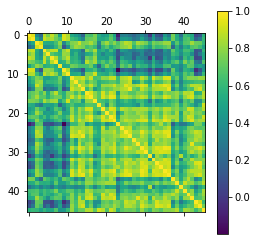

In [20]:
plt.matshow(corr_matrix['GA01', 1, 1])
plt.colorbar()

In [23]:
with open('20200107_corr-matrix.pkl', 'wb') as file:
    pickle.dump(file=file, obj=corr_matrix)

In [29]:
corr_matrix_mat = {subj: np.zeros((6, 8, len(roi_names), len(roi_names))) for subj in subj_list}

for (subj, nrun, nblock), values in corr_matrix.items():
    corr_matrix_mat[subj][nrun-1, nblock-1, :, :] = values

scipy.io.savemat('20200107_corr_matrix.mat', corr_matrix_mat)